# EXPLORING AND MODELING FUEL CONSUMPTION DATASET


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### <b>GOAL:</b> Explore and create a ML model to predict CO² emission.

### Importing necessary libraries and dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

### Let's first have a descriptive explore on the data:

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Exploring some features.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


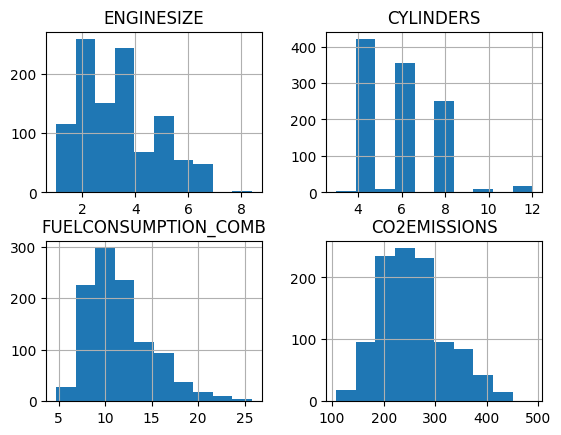

In [6]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] # making a array of features
viz.hist() # making a histogram of the array
plt.show()

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function:

In [7]:
msk = np.random.rand(len(df)) < 0.8 # this line is creating a mask, selecting random number and assigning to bool True just for 0.8 of the data (80% of it)
train = cdf[msk] # this variable corresponds to 80% of the data for training
test = cdf[~msk] # this variable corresponds to 20% of the data for testing

### Simple Linear Regression
Utilizing the feature `engine size` as a predictor and the 'CO² emissions as the `response variable`


In [8]:
import seaborn as sns
print("Seaborn version", sns.__version__)

Seaborn version 0.12.2


Plotting a graph showing how the engine size (x-axis) relates to `CO2 emissions` (y-axis) using the data from the `train` dataset. It visualizes this relationship.

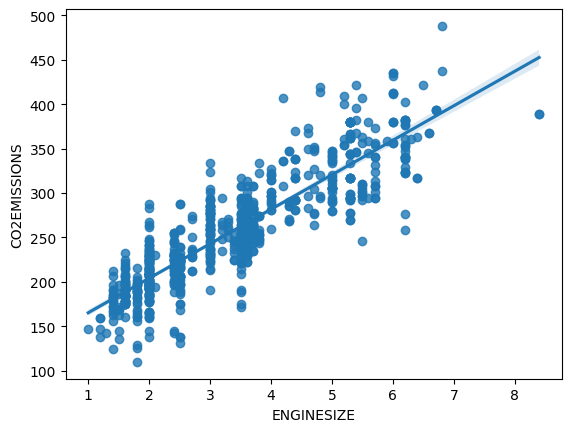

In [9]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=train)
plt.show()

## Modeling

In [10]:
from sklearn import linear_model

### Fitting the trainning set to a Linear Regression model: `y_train = intercept + coefficient.x_train`

In simple linear regression, we have a line that represents a relationship between two things. The Coefficient and Intercept are just two numbers that describe this line. 

When we use a tool like `scikit-learn` (sklearn), it can figure out these numbers for us from the data we have. But, it needs all of the data to do this properly because it's like drawing the best-fitting line through all the points, and you need to see all the points to draw it correctly.

In [11]:
reg = linear_model.LinearRegression() # creating a Linear Regression object
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)
print("Coefficient: ", round(float(reg.coef_), 2))
print("Intercept:", round(float(reg.intercept_), 2))

Coefficient:  38.81
Intercept: 126.49


When we want to know how good or bad our regression model is, we use evaluation metrics such as `Mean Absolute Error (MAE)`, `Mean Squared Error (MSE)`, `Root Mean Squared Error (RMSE)`. These metrics help us figure out where our model is doing well and where it's not.



When we want to know how good or bad our regression model is, we use evaluation metrics. These metrics help us figure out where our model is doing well and where it's not.

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predicted_y = reg.predict(test_x)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(predicted_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) **2))

Mean absolute error (MAE): 26.10
Residual sum of squares (MSE): 1149.67


R-squared: This doesn't measure errors directly, but it tells us how well our model fits the data. If R-squared is close to 1, our model is doing a good job. If it's negative, our model is worse than just guessing with an average value.

In [13]:
print("R²-score: %.2f" % r2_score(test_y, predicted_y))

R²-score: 0.74


Training a `Regression Model` using `FUELCONSUMPTION_COMB` feature.

In [14]:
train_x = train[['FUELCONSUMPTION_COMB']]
test_x = test[['FUELCONSUMPTION_COMB']]

Coefficient:  16.01
Intercept: 70.8
Axes(0.125,0.11;0.775x0.77)


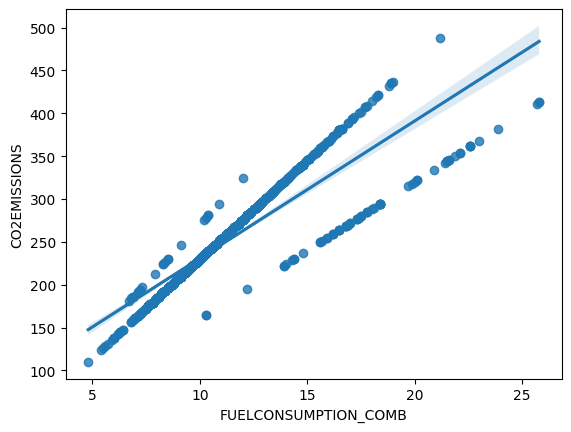

In [15]:
train_x = np.asanyarray(train_x)
reg.fit(train_x, train_y)
print("Coefficient: ", round(float(reg.coef_), 2))
print("Intercept:", round(float(reg.intercept_), 2))

print(sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=train))

In [16]:
predictions = reg.predict(test_x)
print("The Mean Absolute Error is %.2f" % np.mean(np.absolute(predictions - test_y)))
print("The R-squared score is %.2f" % r2_score(test_y, predictions))

The Mean Absolute Error is 21.09
The R-squared score is 0.81


### Multiple Regression Model
In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [17]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x, y)
print("Coefficients: ", reg.coef_)

Coefficients:  [[11.40709925  7.60592661  9.12804833]]


Calculating estimated target output ($\hat{y}$) \
$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  

In [18]:
y_hat = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) **2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x, y))

Residual sum of squares: 606.75
Variance score: 0.86


With the result of the Variance Score = `0.87` we can say the MLR model is a better fit than SLR for this problem.